# Exercise 12

## Analyze how travelers expressed their feelings on Twitter

### Maxwell Calderon Coy . 201920519
### Sergio Ardila Rodríguez 201924139
### Jhon Alex Hernandez 200950288
### Alexander Camargo García 2009325


A sentiment analysis job about the problems of each major U.S. airline. 
Twitter data was scraped from February of 2015 and contributors were 
asked to first classify positive, negative, and neutral tweets, followed
by categorizing negative reasons (such as "late flight" or "rude service").

In [43]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import r2_score, roc_auc_score
from sklearn.model_selection import train_test_split

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
tweets = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/Tweets.zip', index_col=0)

tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [2]:
tweets.shape

(14640, 14)

### Proportion of tweets with each sentiment

In [3]:
tweets['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

### Proportion of tweets per airline


In [4]:
tweets['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

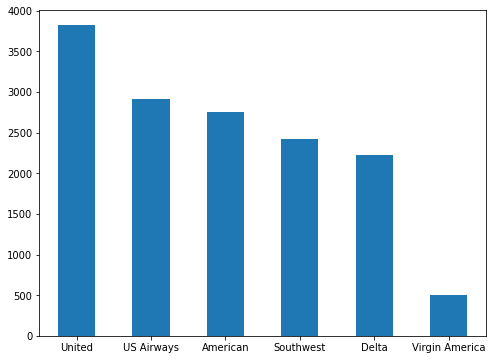

In [5]:
pd.Series(tweets["airline"]).value_counts().plot(kind = "bar",figsize=(8,6),rot = 0)

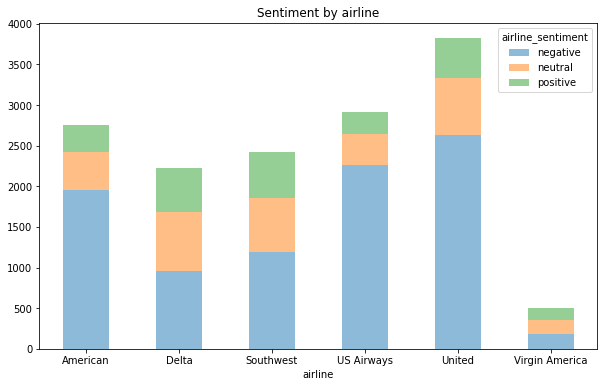

In [6]:
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiment by airline")

# Exercise 12.1 

Predict the sentiment using CountVectorizer

use Random Forest classifier

In [7]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

In [8]:
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [24]:
X

tweet_id
570306133677760513                  @VirginAmerica What @dhepburn said.
570301130888122368    @VirginAmerica plus you've added commercials t...
570301083672813571    @VirginAmerica I didn't today... Must mean I n...
570301031407624196    @VirginAmerica it's really aggressive to blast...
570300817074462722    @VirginAmerica and it's a really big bad thing...
570300767074181121    @VirginAmerica seriously would pay $30 a fligh...
570300616901320704    @VirginAmerica yes, nearly every time I fly VX...
570300248553349120    @VirginAmerica Really missed a prime opportuni...
570299953286942721      @virginamerica Well, I didn't…but NOW I DO! :-D
570295459631263746    @VirginAmerica it was amazing, and arrived an ...
570294189143031808    @VirginAmerica did you know that suicide is th...
570289724453216256    @VirginAmerica I &lt;3 pretty graphics. so muc...
570289584061480960    @VirginAmerica This is such a great deal! Alre...
570287408438120448    @VirginAmerica @virginmedia I'm f

In [63]:
# define a function that accepts a vectorizer and calculates the accuracy
def tokenize_test(vect):
    X_dtms = vect.fit_transform(X)
    print('Features: ', X_dtms.shape[1])
    clf = RandomForestClassifier()
    print(pd.Series(cross_val_score(clf, X_dtms, y, cv=10)).describe())
    

In [65]:
vect = CountVectorizer()
tokenize_test(vect)

Features:  15051


C:\Users\Sergio\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Sergio\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Sergio\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Sergio\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Sergio\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

count    10.000000
mean      0.711677
std       0.027028
min       0.650956
25%       0.707873
50%       0.715944
75%       0.717213
max       0.752732
dtype: float64


### Se encuentra un accuracy de predicción del 0.7159 para el sentiment prediction de acuerdo a la tokenización realizada inicialmente. Se evaluará el accuracy de la predicción realizando la remoción de stopwords.

# Exercise 12.2 

Remove stopwords, then predict the sentiment using CountVectorizer.

use Random Forest classifier

In [12]:
from sklearn.naive_bayes import MultinomialNB

In [66]:
# Default CountVectorizer
vect = CountVectorizer( lowercase=True, stop_words='english')
tokenize_test(vect)

Features:  14770


C:\Users\Sergio\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Sergio\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Sergio\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Sergio\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Sergio\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

count    10.000000
mean      0.696238
std       0.039356
min       0.618169
25%       0.679184
50%       0.700612
75%       0.715556
max       0.765027
dtype: float64


### Teniendo en cuenta la remoción de las stopwords del vocabulario, se nota un accuracy de clasificación del 0.7006, el cual es un indicador menor que la clasificación inicial.

# Exercise 12.3

Increase n_grams size (with and without stopwords),  then predict the sentiment using CountVectorizer

use Random Forest classifier

In [67]:
vect = CountVectorizer(ngram_range=(1, 2), lowercase=True, stop_words='english')
tokenize_test(vect)

Features:  100073


C:\Users\Sergio\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Sergio\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Sergio\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Sergio\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Sergio\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

count    10.000000
mean      0.689751
std       0.045064
min       0.605874
25%       0.667228
50%       0.694806
75%       0.706655
max       0.779372
dtype: float64


### Incrementando los n-gramas a 2 y removiendo stopwords en inglés, se puede ver un accuracy de 0.695, el cual representa menor   valor que la primera prueba, sin embargo se puede probar realizando el aumento de n-gramas a 3 y4 para revisar el desempeño del modelo.

In [68]:
vect = CountVectorizer(ngram_range=(1, 3), lowercase=True, stop_words='english')
tokenize_test(vect)

Features:  201010


C:\Users\Sergio\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Sergio\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Sergio\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Sergio\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Sergio\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

count    10.000000
mean      0.691866
std       0.044978
min       0.599727
25%       0.678332
50%       0.689337
75%       0.710872
max       0.777322
dtype: float64


### Se evidencia que aumentando los n-gramas, el modelo puede contextualizar de la misma manera, sin ningún cambio considerable la opinión para dar una clasificación de la opinión de los usuarios de Twitter (Accuracy de 0.70), se puede probar incluso con n-gramas de magnitud 4 para evaluar los resultados.

# Exercise 12.4

Predict the sentiment using TfidfVectorizer.

use Random Forest classifier

In [69]:
vect = TfidfVectorizer(lowercase=True, stop_words='english')
dtm = vect.fit_transform(X)
features = vect.get_feature_names()
tokenize_test(vect)

Features:  14770


C:\Users\Sergio\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Sergio\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Sergio\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Sergio\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Sergio\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

count    10.000000
mean      0.698019
std       0.033104
min       0.622951
25%       0.689028
50%       0.707209
75%       0.708483
max       0.753415
dtype: float64


### Como conclusión de los ejercicios realizados, se puede ver que el mejor resultado de accuracy con un clasificador Random Forest para una clasificación de comentarios de una aerolínea fue a través del CountVectorizer. Dado que a través de las diferentes variaciones realizadas, los valores eran similares, sin embargo el de mayor accuracy fue el mencionado.

Como Resumen, se ubican los siguientes accuracy:

* CountVectorizer: 0.7159
* CountVectorizer (sin stopwords): 0.7006
* CountVectorizer (Con n-gramas: 2): 0.695
* CountVectorizer (Con n-gramas: 3): 0.689
* TFIDF Vectorizer: 0.707
